**The Data Science Method**


1.   [Problem Identification](https://medium.com/@aiden.dataminer/the-data-science-method-problem-identification-6ffcda1e5152)

2.   [Data Wrangling](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-data-collection-organization-and-definitions-d19b6ff141c4)
  * Data Collection - Collected data from wikipedia and quandl wiki price dataset. The wikipedia showed us the currect S&P 500 companies and used their ticker symbols to query quandl wiki prices.
  * Data Organization - Done using cookiecutter
  * Data Definition
  * Data Cleaning - The S&P 500 data from quandls wiki price is clean and ready for analysis use but has lost its support from Quandl community as of April 11, 2018. So we will use this dataset to setup the protfolio optimizer with proof of concept then use a different data source later for cost efficiencies.

3.   [**Exploratory Data Analysis**](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-exploratory-data-analysis-bc84d4d8d3f9)
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   [Pre-processing and Training Data Development](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-pre-processing-and-training-data-development-fd2d75182967)
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   [Modeling](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-modeling-56b4233cad1b)
  * Create dummy or indicator features for categorical variable
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   [Documentation](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-documentation-c92c28bd45e6)

  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code
  * Finalize Documentation


First, loads the needed packages and modules into Python. Then loads the data into a pandas dataframe for ease of use.

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
# import quandl
import pandas as pd 
import numpy as np
from scipy.stats import norm

import dotenv
import os

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline



In [2]:
# prints current directory
current_dir = os.getcwd()
print("Current Directory: ")
print(current_dir)

Current Directory: 
/Users/jb/Development/courses/springboard/ds/Assignments/Portfolio-Optimization/portopt/notebooks/exploratory


In [3]:
# prints parent directory
project_dir = os.path.abspath(os.path.join(os.path.join(current_dir, os.pardir), os.pardir))
print("Parent Directory: ")
print(project_dir)

Parent Directory: 
/Users/jb/Development/courses/springboard/ds/Assignments/Portfolio-Optimization/portopt


In [4]:
print(os.listdir())

['3.0-jujbates-S&P500-PO_eda.ipynb', '.DS_Store', '.ipynb_checkpoints', '3.0-jujbates-S&P500-PO_eda1.ipynb', '2.0-jujbates-S&P500-PO_data_wrangling.ipynb']


In [5]:
plt.style.use('dark_background')
c = ['white', 'springgreen', 'fuchsia', 'lightcoral', 'red'] # Color
s = [24, 20, 16, 12]  # Size
w = [0.75, 1, 1.25, 1.50] # Line Width
ga = 0.10 # Grid Alpha

In [6]:
sp_df = pd.read_csv(project_dir + '/data/interim/'+ 'yahoo_sp500_adj_close_interim.csv', index_col=['date'])

sp_wiki_df =  pd.read_csv(project_dir + '/data/interim/'+ 'wiki_sp500_interim.csv', index_col=['Symbol'])
sp_slick_df = pd.read_csv(project_dir + '/data/interim/'+ 'slick_sp500_interim.csv', index_col=['#'])



In [7]:
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2019-01-02 to 2019-12-31
Columns: 495 entries, F to NVR
dtypes: float64(495)
memory usage: 976.5+ KB


In [8]:
sp_slick_df

,Company,Symbol,Weight,Price,Chg,% Chg
#,,,,,,
1,Apple Inc.,AAPL,6.499271,115.09,0.05,(0.04%)
2,Microsoft Corporation,MSFT,5.679779,217.00,0.77,(0.36%)
3,Amazon.com Inc.,AMZN,4.723456,3215.00,10.60,(0.33%)
4,Facebook Inc. Class A,FB,2.335458,286.30,1.51,(0.53%)
5,Alphabet Inc. Class A,GOOGL,1.686059,1636.50,3.52,(0.22%)
...,...,...,...,...,...,...
501,HollyFrontier Corporation,HFC,0.010314,20.39,0.00,(0.00%)
502,TechnipFMC Plc,FTI,0.010055,6.47,0.00,(0.00%)
503,Under Armour Inc. Class A,UAA,0.008978,14.66,0.00,(0.00%)


In [9]:
sp_df.index

Index(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07', '2019-01-08',
       '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-14', '2019-01-15',
       ...
       '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
       '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31'],
      dtype='object', name='date', length=252)

In [10]:
sp_df.index = pd.to_datetime(sp_df.index)
sp_df.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='date', length=252, freq=None)

In [11]:
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-01-02 to 2019-12-31
Columns: 495 entries, F to NVR
dtypes: float64(495)
memory usage: 976.5 KB


In [12]:
def _plot_adj_close(ax, df, df_cols, ticker, title=None, ylabel=None):
    ax.set_title(title, fontsize=s[1])
    ax.set_ylabel(ylabel, fontsize=s[2])
    ax.plot(df.index.values, df.iloc[:,:100], linewidth=w[0], color=c[0], alpha=0.15)
    ax.plot(df.index.values, df[ticker], label=ticker, linewidth=w[3], color=c[2])
    
    ax.legend(loc='upper left', title = 'Tickers')
    ax.grid(alpha=ga)


def plot_sector_adj_close(sector, ticker):
    
    fig, (ax1) = plt.subplots(1, figsize=(20, 24))

    _plot_adj_close(ax1, sp_df, sp_df.loc[:,ticker], ticker,
                   f"S&P 500 Stocks ({sector} - {ticker})",
                   f"Price")
    
    plt.xticks(fontsize=s[3])
    plt.yticks(fontsize=s[3])
    plt.show()
    return 

interact(plot_sector_adj_close, 
         sector=sp_df, 
         ticker=sp_df);



interactive(children=(Dropdown(description='sector', options=('F', 'AMCR', 'GE', 'FCX', 'NWSA', 'NWS', 'HBAN',…

In [13]:

def plot_adj_close_daily_return_hist(ticker):
    
    sp_daily_lag_df = sp_df.shift(1)
    sp_dr_df = (sp_daily_lag_df/sp_df) - 1

    
    mean = sp_dr_df.mean()
    
    
    std = sp_dr_df.std()

    fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 16))
    ax1.set_title(f"S&P 500 Stocks ({ticker})", fontsize=s[1])
    ax1.set_ylabel(f"Price", fontsize=s[2])
    ax1.plot(sp_df.index.values, sp_df[ticker], label=ticker, linewidth=w[3], color=c[2])
    
    ax1.legend(loc='upper left', title = 'Tickers')
    ax1.grid(alpha=ga)
    
    ax2.set_title(f"S&P 500 Stocks ({ticker})", fontsize=s[1])
    ax2.set_ylabel(f"Price", fontsize=s[2])
    
    ax2.hist(sp_dr_df[ticker], bins=50, label=ticker, linewidth=w[3], color=c[1])
    
    ax2.axvline(mean[ticker], color='red', linestyle='dashed', linewidth=2)
    #to plot the std line we plot both the positive and negative values 
    ax2.axvline(std[ticker], color='g', linestyle='dashed', linewidth=2)
    ax2.axvline(-std[ticker], color='g', linestyle='dashed', linewidth=2)

    ax2.legend(loc='upper left', title = 'Tickers')
    ax2.grid(alpha=ga)
    
    plt.xticks(fontsize=s[3])
    plt.yticks(fontsize=s[3])
    plt.show()
    
    return 

interact(plot_adj_close_daily_return_hist, 
         ticker=sp_df);



interactive(children=(Dropdown(description='ticker', options=('F', 'AMCR', 'GE', 'FCX', 'NWSA', 'NWS', 'HBAN',…

#### Cumulative Returns

In [14]:
# Cumulative Return
def cumulative_return(df):
    return (df.iloc[-1,:] / df.iloc[0,:]) - 1

sp_cr = cumulative_return(sp_df)
sp_cr.head()

F       0.277604
AMCR    0.230817
GE      0.447578
FCX     0.289625
NWSA    0.259801
dtype: float64

In [15]:
# Calculate percentage returns
returns = sp_df.pct_change()

In [16]:
# Calculate individual mean returns 
meanDailyReturns = returns.mean()

In [17]:
# Define weights for the portfolio
weights = np.array([100 / sp_df.shape[1] for x in range(sp_df.shape[1])])

In [18]:
# Calculate expected portfolio performance
portReturn = np.sum(meanDailyReturns * weights)

In [19]:
# Create portfolio returns column
returns['Portfolio'] = returns.dot(weights)

In [20]:
# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()

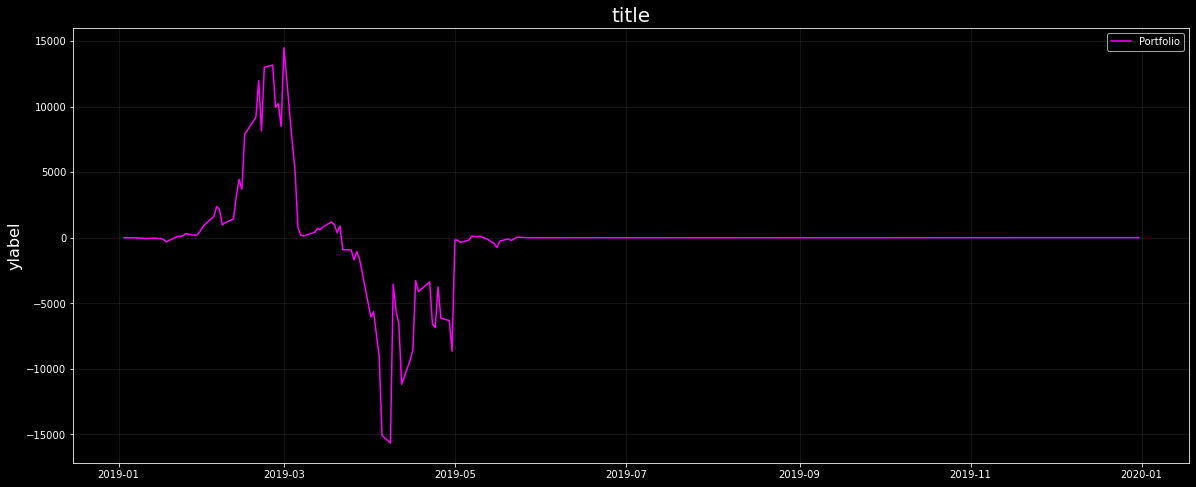

In [21]:
# Plot the portfolio cumulative returns only
# fig, ax = plt.subplots()
# ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color=c[2], label="Portfolio")
# plt.legend()
# plt.show()



fig, ax = plt.subplots(1, figsize=(20, 8))
ax.set_title("title", fontsize=s[1])
ax.set_ylabel("ylabel", fontsize=s[2])
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color=c[2], label="Portfolio")

ax.legend(loc='upper right')
ax.grid(alpha=ga)

In [22]:
# Get percentage daily returns
daily_returns = sp_df.pct_change()

# Calculate the covariance matrix 
cov_matrix = (daily_returns.cov())*252

# Calculate the portfolio variance
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(portfolio_variance, 4) * 100) + '%')

# Calculate the standard deviation by taking the square root
portfolio_standard_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Print the results 
print(str(np.round(portfolio_standard_dev, 4) * 100) + '%')


16143.72%
1270.58%


In [23]:
# Calculate total rate of return from start to end
total_return = (sp_df.iloc[-1,:] - sp_df.iloc[0,:]) / sp_df.iloc[0,:]
print(total_return)

F        0.277604
AMCR     0.230817
GE       0.447578
FCX      0.289625
NWSA     0.259801
           ...   
GOOG     0.278405
GOOGL    0.269949
AMZN     0.200574
BKNG     0.192850
NVR      0.573190
Length: 495, dtype: float64


In [24]:
# Annualize return
annualized_return = ((1 + total_return)**(12 / 12)) - 1
annualized_return['Portfolio'] = annualized_return.dot(weights)
print (annualized_return)

F             0.277604
AMCR          0.230817
GE            0.447578
FCX           0.289625
NWSA          0.259801
               ...    
GOOGL         0.269949
AMZN          0.200574
BKNG          0.192850
NVR           0.573190
Portfolio    32.267996
Length: 496, dtype: float64


In [25]:
# risk-free rate
rfr = 0

# Calculate annualized volatility from the standard deviation
vol_sp500 = returns['Portfolio'].std() * np.sqrt(252)

# Calculate the Sharpe ratio 
sharpe_ratio = ((annualized_return['Portfolio'] - rfr) / vol_sp500)
print (sharpe_ratio)

2.5396286759464766


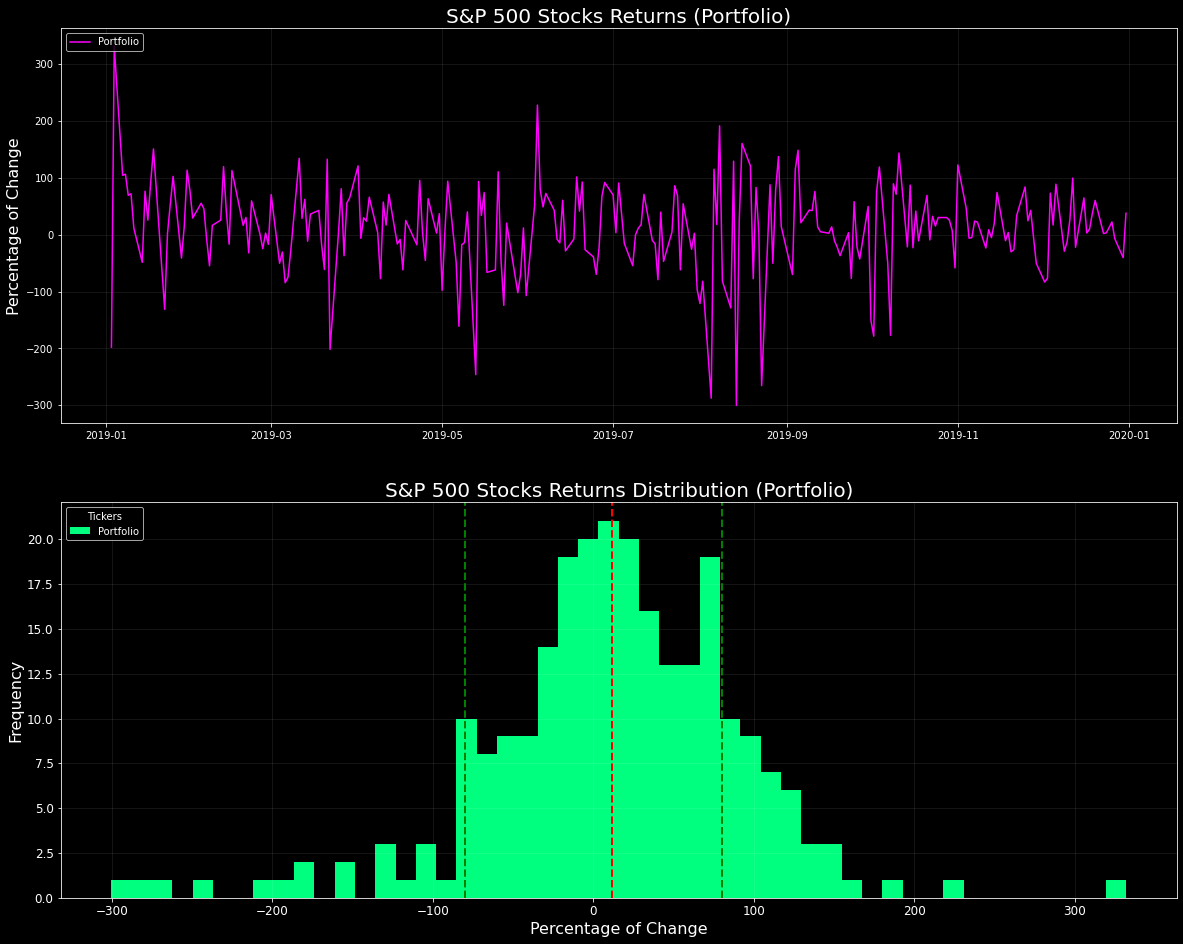

In [26]:

fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 16))
ax1.set_title(f"S&P 500 Stocks Returns (Portfolio)", fontsize=s[1])
ax1.set_ylabel(f"Percentage of Change", fontsize=s[2])
ax1.plot(returns.index.values, returns.Portfolio*100, label='Portfolio', linewidth=w[3], color=c[2])

ax1.legend(loc='upper left')
ax1.grid(alpha=ga)


returns_mean = returns.mean()
returns_std = returns.std()

ax2.set_title(f"S&P 500 Stocks Returns Distribution (Portfolio)", fontsize=s[1])
ax2.set_ylabel(f"Frequency", fontsize=s[2])
ax2.set_xlabel(f"Percentage of Change", fontsize=s[2])

ax2.hist(returns.Portfolio*100, bins=50, label='Portfolio', linewidth=w[3], color=c[1])

ax2.axvline(returns_mean.Portfolio*100, color='red', linestyle='dashed', linewidth=2)
#to plot the std line we plot both the positive and negative values 
ax2.axvline(returns_std.Portfolio*100, color='g', linestyle='dashed', linewidth=2)
ax2.axvline(-returns_std.Portfolio*100, color='g', linestyle='dashed', linewidth=2)

ax2.legend(loc='upper left', title = 'Tickers')
ax2.grid(alpha=ga)

plt.xticks(fontsize=s[3])
plt.yticks(fontsize=s[3])
plt.show()


In [27]:
returns_skew = returns.skew()
returns_kurtosis = returns.kurtosis()

print('Returns Skew: ')
print(returns_skew.Portfolio)
print('---------------------------------')
print('Returns Kurtosis: ')
print(returns_kurtosis.Portfolio)

Returns Skew: 
-0.583266264291717
---------------------------------
Returns Kurtosis: 
2.7614877057618377


In [28]:
target = 0

# Create a downside return column with the negative returns only
downside_returns = returns.loc[returns.Portfolio < target]

# Calculate expected return and std dev of downside
expected_return_mean = returns.Portfolio.mean()
downside_returns_std = downside_returns.Portfolio.std()

# Calculate the sortino ratio
sortino_ratio = (expected_return_mean - rfr)/downside_returns_std

# Print the results
print("Expected return  : ", expected_return_mean*100)
print("Downside risk   : ", downside_returns_std*100)
print("Sortino ratio : ", sortino_ratio)

Expected return  :  11.81922517931064
Downside risk   :  63.389791269990944
Sortino ratio :  0.18645313294959406


In [29]:
# Calculate the max value 
roll_max = sp_df.rolling(center=False, min_periods=1, window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = sp_df/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False, min_periods=1, window=252).min()





In [30]:
def plot_daily_down(ticker):

    fig, ax1 = plt.subplots(1, figsize=(20, 16))
    ax1.set_title(f"S&P 500 Stocks ({ticker})", fontsize=s[1])
    ax1.set_ylabel(f"Price", fontsize=s[2])
    # Plot the results
    ax1.plot(sp_df.index.values, daily_draw_down[ticker], label='Daily drawdown')
    ax1.plot(sp_df.index.values, max_daily_draw_down[ticker], label='Maximum daily drawdown in time-window')

    ax1.legend(loc='upper right', title = 'Tickers')
    ax1.grid(alpha=ga)
    
    return 

interact(plot_daily_down, 
         ticker=sp_df);



interactive(children=(Dropdown(description='ticker', options=('F', 'AMCR', 'GE', 'FCX', 'NWSA', 'NWS', 'HBAN',…

In [31]:
weights.sum()

100.0

In [35]:
# Calculate return of the portfolio
# total_return_pf = (weights*portfolio_data['mean_return']).sum()